In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('csvs/transfer.csv')
data

plt.figure(figsize=(16, 9), dpi=300)

<Figure size 4800x2700 with 0 Axes>

<Figure size 4800x2700 with 0 Axes>

In [102]:
data.attack.unique()

array(['LInfFMNAttack', 'LinfDeepFoolAttack', 'LinfFastGradientAttack',
       'SquareAttack'], dtype=object)

# PARAMS

In [236]:
dataset = 'SVHN'

# Accuracy

In [237]:
mnist = data[data['dataset'] == dataset].drop('dataset', axis = 1)
mnist

,model,epochs_trained,extraction_layer,attack,epsilon,susceptibility_rate,train_accuracy,test_accuracy,baseline_model,baseline_train_accuracy,baseline_test_accuracy,baseline_susceptibility_rate
180,GeneralParaLIF,20,0,LInfFMNAttack,0.01,0.452439,0.655760,0.641825,LeNet5_Representations_Flexible_CIFAR,0.924171,0.873463,0.630824
181,GeneralParaLIF,20,1,LInfFMNAttack,0.01,0.380026,0.605881,0.600722,LeNet5_Representations_Flexible_CIFAR,0.924171,0.873463,0.630824
182,GeneralParaLIF,20,2,LInfFMNAttack,0.01,0.191083,0.754058,0.729448,LeNet5_Representations_Flexible_CIFAR,0.924171,0.873463,0.630824
183,GeneralParaLIF,20,3,LInfFMNAttack,0.01,0.074499,0.839005,0.804894,LeNet5_Representations_Flexible_CIFAR,0.924171,0.873463,0.630824
184,GeneralParaLIF,20,4,LInfFMNAttack,0.01,0.253505,0.702718,0.654694,LeNet5_Representations_Flexible_CIFAR,0.924171,0.873463,0.630824
...,...,...,...,...,...,...,...,...,...,...,...,...
355,GeneralSNN,20,0,SquareAttack,0.10,0.221906,0.556001,0.549439,LeNet5_Representations_Flexible_CIFAR,0.970037,0.880570,0.948336
356,GeneralSNN,20,1,SquareAttack,0.10,0.354391,0.495420,0.493162,LeNet5_Representations_Flexible_CIFAR,0.970037,0.880570,0.948336
357,GeneralSNN,20,2,SquareAttack,0.10,0.441637,0.677260,0.640250,LeNet5_Representations_Flexible_CIFAR,0.970037,0.880570,0.948336
358,GeneralSNN,20,3,SquareAttack,0.10,0.552239,0.858198,0.793024,LeNet5_Representations_Flexible_CIFAR,0.970037,0.880570,0.948336


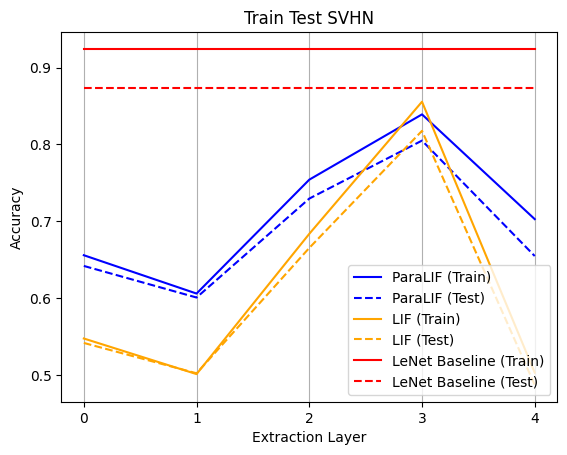

In [249]:
relevant_rows = mnist[mnist.attack == 'LInfFMNAttack']
relevant_rows = relevant_rows[['model', 'extraction_layer', 'train_accuracy', 'test_accuracy', 'baseline_train_accuracy', 'baseline_test_accuracy']].drop_duplicates()
unique_models = relevant_rows.model.unique()

for model, colour in zip(unique_models, ['blue', 'orange']):
    subset = relevant_rows[relevant_rows.model == model]
    plt.plot(subset.extraction_layer, subset.train_accuracy, color=colour, linestyle='solid')
    plt.plot(subset.extraction_layer, subset.test_accuracy, color=colour, linestyle='dashed')
plt.plot(subset.extraction_layer, subset.baseline_train_accuracy, color='red', linestyle='solid')
plt.plot(subset.extraction_layer, subset.baseline_test_accuracy, color='red', linestyle='dashed')
plt.legend([
    'ParaLIF (Train)',
    'ParaLIF (Test)',
    'LIF (Train)',
    'LIF (Test)',
    'LeNet Baseline (Train)',
    'LeNet Baseline (Test)'
])
plt.title(f'Train Test {dataset}')
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.xlabel('Extraction Layer')
plt.ylabel('Accuracy')
plt.show()


# Attacks

## FGSM

To make a useful plot, we need to filter by attack and by epsilon.

Here we need to select an epsilon to plot. The available epsilons are:

In [250]:
mnist_fgsm = mnist[mnist.attack == 'LinfFastGradientAttack']
mnist_fgsm.epsilon.unique()

array([0.01, 0.05, 0.1 ])

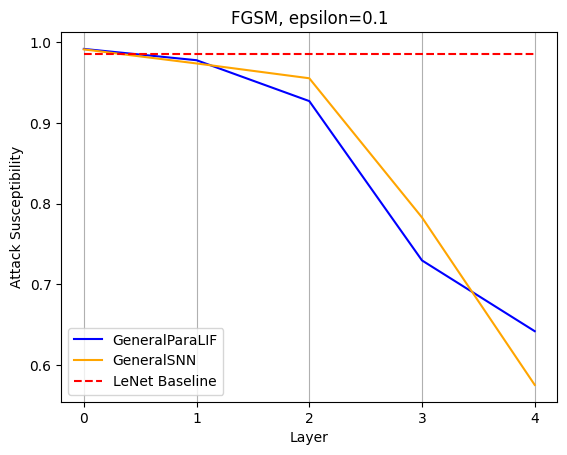

In [253]:
epsilon = 0.1

mnist_fgsm_epsilon = mnist_fgsm[mnist_fgsm.epsilon == epsilon]
for model, colour in zip(unique_models, ['blue', 'orange']):
    subset = mnist_fgsm_epsilon[mnist_fgsm_epsilon.model == model]
    plt.plot(subset.extraction_layer, subset.susceptibility_rate, color=colour)
plt.plot(subset.extraction_layer, subset.baseline_susceptibility_rate, color='red', linestyle='dashed')
plt.legend(unique_models.tolist() + ['LeNet Baseline'])
plt.xlabel('Layer')
plt.ylabel('Attack Susceptibility')
plt.title(f'FGSM, epsilon={epsilon}')
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.show()

## DeepFool

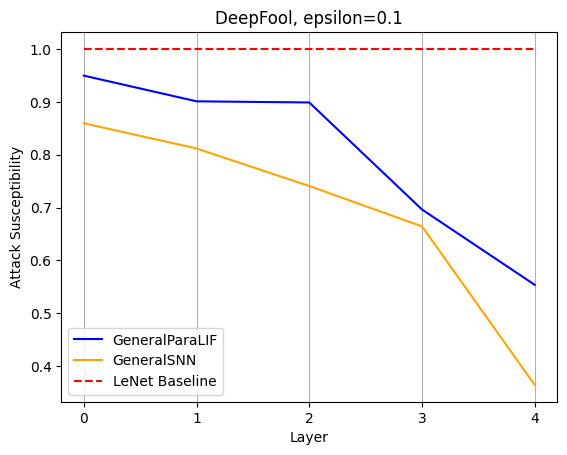

In [256]:
epsilon = 0.1

mnist_deepfool = mnist[mnist.attack == 'LinfDeepFoolAttack']
mnist_deepfool_epsilon = mnist_deepfool[mnist_deepfool.epsilon == epsilon]
for model, colour in zip(unique_models, ['blue', 'orange']):
    subset = mnist_deepfool_epsilon[mnist_deepfool_epsilon.model == model]
    plt.plot(subset.extraction_layer, subset.susceptibility_rate, color=colour)
plt.plot(subset.extraction_layer, subset.baseline_susceptibility_rate, color='red', linestyle='dashed')
plt.legend(unique_models.tolist() + ['LeNet Baseline'])
plt.xlabel('Layer')
plt.ylabel('Attack Susceptibility')
plt.title(f'DeepFool, epsilon={epsilon}')
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.show()

## FMNA

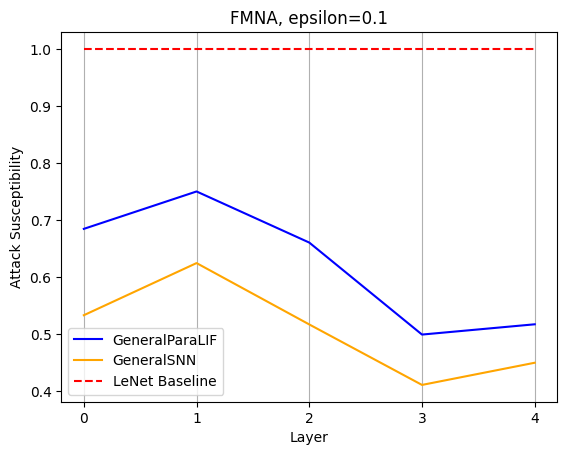

In [259]:
epsilon = 0.1

mnist_fmna = mnist[mnist.attack == 'LInfFMNAttack']
mnist_fmna_epsilon = mnist_fmna[mnist_fmna.epsilon == epsilon]
for model, colour in zip(unique_models, ['blue', 'orange']):
    subset = mnist_fmna_epsilon[mnist_fmna_epsilon.model == model]
    plt.plot(subset.extraction_layer, subset.susceptibility_rate, color=colour)
plt.plot(subset.extraction_layer, subset.baseline_susceptibility_rate, color='red', linestyle='dashed')
plt.legend(unique_models.tolist() + ['LeNet Baseline'])
plt.xlabel('Layer')
plt.ylabel('Attack Susceptibility')
plt.title(f'FMNA, epsilon={epsilon}')
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.show()

# Square

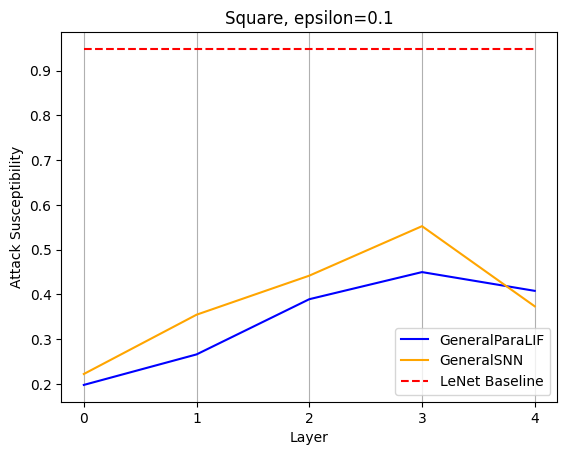

In [262]:
epsilon = 0.1

mnist_fmna = mnist[mnist.attack == 'SquareAttack']
mnist_fmna_epsilon = mnist_fmna[mnist_fmna.epsilon == epsilon]
for model, colour in zip(unique_models, ['blue', 'orange']):
    subset = mnist_fmna_epsilon[mnist_fmna_epsilon.model == model]
    plt.plot(subset.extraction_layer, subset.susceptibility_rate, color=colour)
plt.plot(subset.extraction_layer, subset.baseline_susceptibility_rate, color='red', linestyle='dashed')
plt.legend(unique_models.tolist() + ['LeNet Baseline'])
plt.xlabel('Layer')
plt.ylabel('Attack Susceptibility')
plt.title(f'Square, {epsilon=}')
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.show()

# Magnitude (UNUSED)

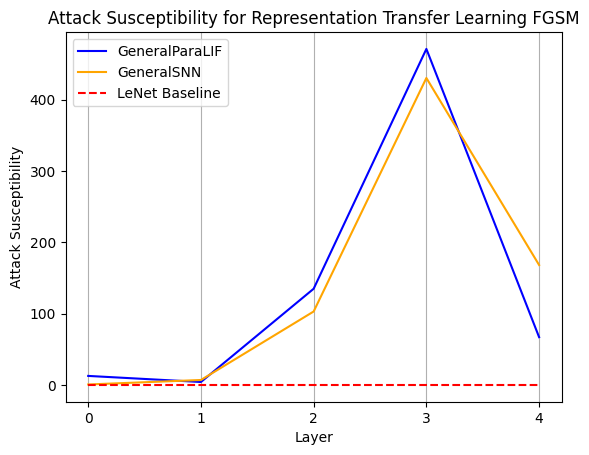

In [61]:
epsilon = 0.01

mnist_fgsm_epsilon = mnist_fgsm[mnist_fgsm.epsilon == epsilon]
for model, colour in zip(unique_models, ['blue', 'orange']):
    subset = mnist_fgsm_epsilon[mnist_fgsm_epsilon.model == model]
    plt.plot(subset.extraction_layer, (subset.baseline_susceptibility_rate / subset.susceptibility_rate - 1) * 100, color=colour)
plt.plot(subset.extraction_layer, (subset.baseline_susceptibility_rate / subset.baseline_susceptibility_rate - 1) * 100, color='red', linestyle='dashed')
plt.legend(unique_models.tolist() + ['LeNet Baseline'])
plt.xlabel('Layer')
plt.ylabel('Attack Susceptibility')
plt.title('Attack Susceptibility for Representation Transfer Learning FGSM')
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.show()

# Train/Test SD

In [263]:
sd_data = pd.read_csv('csvs/transfer_train_test_sd.csv')
aggregated_data = sd_data.groupby(
    ['dataset', 'model', 'pretrained_model', 'extraction_layer']
)[['train_accuracy', 'test_accuracy']].agg(['mean', 'std']).reset_index()
aggregated_data

dataset    model pretrained_model extraction_layer train_accuracy  \
                                                                 mean   
0   FASHION      LIF           LeNet5                0       0.839697   
1   FASHION      LIF           LeNet5                1       0.786820   
2   FASHION      LIF           LeNet5                2       0.911910   
3   FASHION      LIF           LeNet5                3       0.934737   
4   FASHION      LIF           LeNet5                4       0.609177   
5   FASHION  ParaLIF           LeNet5                0       0.824203   
6   FASHION  ParaLIF           LeNet5                1       0.852480   
7   FASHION  ParaLIF           LeNet5                2       0.872787   
8   FASHION  ParaLIF           LeNet5                3       0.846953   
9   FASHION  ParaLIF           LeNet5                4       0.647617   
10    MNIST      LIF           LeNet5                0       0.921627   
11    MNIST      LIF           LeNet5                1       0.927157   
12    MNIST      LIF           LeNet5                2       0.931983   
13    MNIST      LIF           LeNet5                3       0.994137   
14    MNIST      LIF           LeNet5                4       0.907237   
15    MNIST  ParaLIF           LeNet5                0       0.950277   
16    MNIST  ParaLIF           LeNet5                1       0.987783   
17    MNIST  ParaLIF           LeNet5                2       0.992473   
18    MNIST  ParaLIF           LeNet5                3       0.890553   
19    MNIST  ParaLIF           LeNet5                4       0.955683   
20     SVHN      LIF           LeNet5                0       0.516278   
21     SVHN      LIF           LeNet5                1       0.548398   
22     SVHN      LIF           LeNet5                2       0.814161   
23     SVHN      LIF           LeNet5                3       0.735629   
24     SVHN      LIF           LeNet5                4       0.572532   
25     SVHN  ParaLIF           LeNet5                0       0.525151   
26     SVHN  ParaLIF           LeNet5                1       0.779734   
27     SVHN  ParaLIF           LeNet5                2       0.793931   
28     SVHN  ParaLIF           LeNet5                3       0.742550   
29     SVHN  ParaLIF           LeNet5                4       0.707605   

             test_accuracy            
         std          mean       std  
0   0.051255      0.828760  0.048709  
1   0.045159      0.778960  0.045172  
2   0.026946      0.878280  0.019470  
3   0.033285      0.885640  0.021844  
4   0.033816      0.589620  0.034265  
5   0.031675      0.810320  0.031311  
6   0.019286      0.839740  0.021608  
7   0.037446      0.844680  0.033319  
8   0.015128      0.804220  0.011389  
9   0.013700      0.625740  0.012274  
10  0.051030      0.918480  0.050588  
11  0.049399      0.924940  0.049289  
12  0.055567      0.928880  0.053630  
13  0.000161      0.988540  0.000207  
14  0.048452      0.903460  0.049570  
15  0.054106      0.944380  0.053713  
16  0.000625      0.983220  0.001083  
17  0.000802      0.986340  0.001001  
18  0.006905      0.884000  0.006161  
19  0.001285      0.952900  0.001707  
20  0.000000      0.513368  0.000000  
21  0.000000      0.543293  0.000000  
22  0.000000      0.784611  0.000000  
23  0.000000      0.712623  0.000000  
24  0.000000      0.551053  0.000000  
25  0.000000      0.517824  0.000000  
26  0.000000      0.758720  0.000000  
27  0.000000      0.764367  0.000000  
28  0.000000      0.712892  0.000000  
29  0.000000      0.656000  0.000000

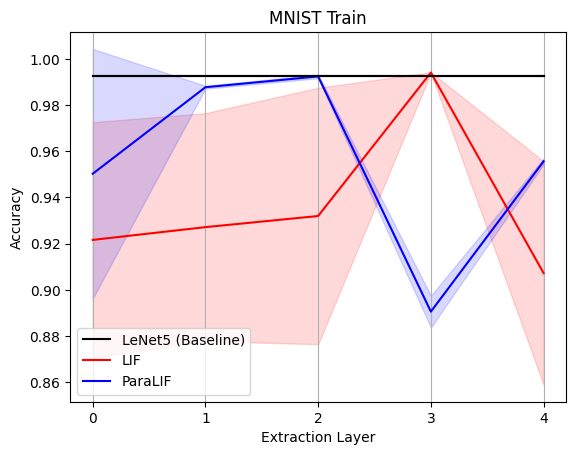

In [267]:
dataset = 'MNIST'

dataset_specific = aggregated_data[aggregated_data.dataset == dataset]

baseline_results = data[data.dataset == dataset][['extraction_layer', 'baseline_train_accuracy', 'baseline_test_accuracy']].drop_duplicates()
plt.plot(baseline_results.extraction_layer, baseline_results.baseline_train_accuracy, color='black')


for model, colour, sd_colour in zip(['LIF', 'ParaLIF'], ['red', 'blue'], ['#FFA07A', 'lightblue']):
    subset = dataset_specific[dataset_specific.model == model]
    # Train
    y1 = subset.train_accuracy['mean'] - subset.train_accuracy['std']
    y2 = subset.train_accuracy['mean'] + subset.train_accuracy['std']
    
    plt.plot(subset.extraction_layer, subset.train_accuracy['mean'], color=colour)

for model, colour in zip(['LIF', 'ParaLIF'], ['red', 'blue']):
    subset = dataset_specific[dataset_specific.model == model]
    # Train
    y1 = subset.train_accuracy['mean'] - subset.train_accuracy['std']
    y2 = subset.train_accuracy['mean'] + subset.train_accuracy['std']
    plt.fill_between(subset.extraction_layer, y1, y2, color=colour, alpha=0.15)

plt.plot(baseline_results.extraction_layer, baseline_results.baseline_train_accuracy, color='black')
plt.legend(['LeNet5 (Baseline)', 'LIF', 'ParaLIF'])
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.title(f'{dataset} Train')
plt.xlabel('Extraction Layer')
plt.ylabel('Accuracy')
plt.show()

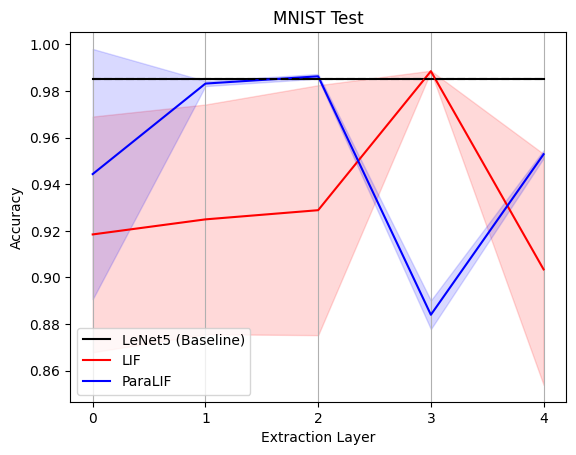

In [266]:
dataset_specific = aggregated_data[aggregated_data.dataset == dataset]


baseline_results = data[data.dataset == dataset][['extraction_layer', 'baseline_train_accuracy', 'baseline_test_accuracy']].drop_duplicates()
plt.plot(baseline_results.extraction_layer, baseline_results.baseline_test_accuracy, color='black')

for model, colour, sd_colour in zip(['LIF', 'ParaLIF'], ['red', 'blue'], ['#FFA07A', 'lightblue']):
    subset = dataset_specific[dataset_specific.model == model]
    y1_test = subset.test_accuracy['mean'] - subset.test_accuracy['std']
    y2_test = subset.test_accuracy['mean'] + subset.test_accuracy['std']
    
    plt.plot(subset.extraction_layer, subset.test_accuracy['mean'], color=colour)

for model, colour in zip(['LIF', 'ParaLIF'], ['red', 'blue']):
    subset = dataset_specific[dataset_specific.model == model]
    y1_test = subset.test_accuracy['mean'] - subset.test_accuracy['std']
    y2_test = subset.test_accuracy['mean'] + subset.test_accuracy['std']
    plt.fill_between(subset.extraction_layer, y1_test, y2_test, color=colour, alpha=0.15)

plt.plot(baseline_results.extraction_layer, baseline_results.baseline_test_accuracy, color='black', linestyle='dashed')
plt.legend(['LeNet5 (Baseline)', 'LIF', 'ParaLIF'])
plt.xticks(subset.extraction_layer)
plt.grid(axis='x')
plt.title(f'{dataset} Test')
plt.xlabel('Extraction Layer')
plt.ylabel('Accuracy')
plt.show()